In [1]:
import numpy as np
import pandas as pd
from numpy import sqrt, pi, exp
from scipy.stats import norm
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib inline

precision = TP/(TP+FP)
recall    = TP/(TP+FN)
F1-score  = harm. mean (precision & recall)
          = 2*TP/(2*TP+FN+FP)
p(FP) - error type 1
p(FN) - error type 2


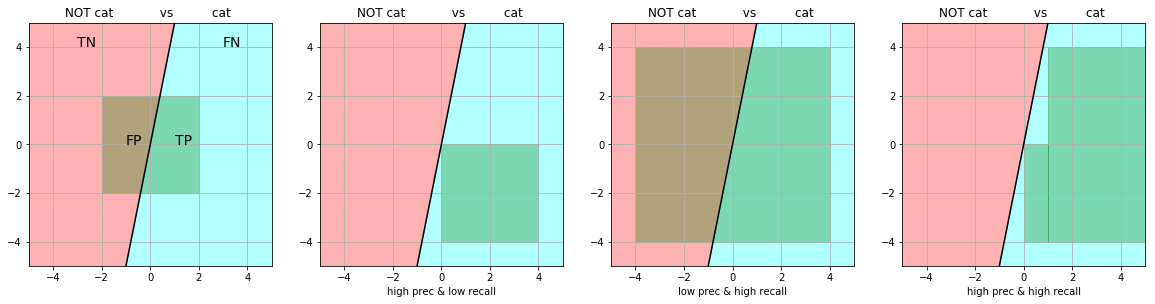

In [2]:
fig = plt.figure(figsize = (20,5))
ax1  = plt.subplot(1,4,1)
ax1 = plt.gca()
circle = patches.Rectangle((-2,-2), 4, 4,fill='True',color='green', alpha=0.3)
ax1.add_artist(circle)
ax1.plot([-10,10],[-50,50],color='black')
ax1.fill_between([-10,10], 5, [-50,50],color='red',label='TN',alpha=0.3)
ax1.fill_between([-10,10], -5, [-50,50],color='cyan',label='TN',alpha=0.3)
ax1.set_aspect(1.0)  # make aspect ratio square
ax1.set_title('NOT cat            vs          cat ')
ax1.text(-3,4,'TN',size=14)
ax1.text(3,4,'FN',size=14)

ax1.text(-1,0,'FP',size=14)
ax1.text(1,0,'TP',size=14)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()

ax2  = plt.subplot(1,4,2)
ax2 = plt.gca()
circle = patches.Rectangle((-0,-4), 4, 4,fill='True',color='green', alpha=0.3)
ax2.add_artist(circle)
ax2.plot([-10,10],[-50,50],color='black')
ax2.fill_between([-10,10], 5, [-50,50],color='red',label='TN',alpha=0.3)
ax2.fill_between([-10,10], -5, [-50,50],color='cyan',label='TN',alpha=0.3)
ax2.set_aspect(1.0)  # make aspect ratio square
ax2.set_title('NOT cat            vs          cat ')
ax2.set_xlabel('high prec & low recall')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()

ax3  = plt.subplot(1,4,3)
ax3 = plt.gca()
circle = patches.Rectangle((-4,-4), 8, 8,fill='True',color='green', alpha=0.3)
ax3.add_artist(circle)
ax3.plot([-10,10],[-50,50],color='black')
ax3.fill_between([-10,10], 5, [-50,50],color='red',label='TN',alpha=0.3)
ax3.fill_between([-10,10], -5, [-50,50],color='cyan',label='TN',alpha=0.3)
ax3.set_aspect(1.0)  # make aspect ratio square
ax3.set_title('NOT cat            vs          cat ')
ax3.set_xlabel('low prec & high recall')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()

ax4  = plt.subplot(1,4,4)
ax4 = plt.gca()
circle = patches.Rectangle((1,-4), 4, 8,fill='True',color='green', alpha=0.3)
ax4.add_artist(circle)
circle = patches.Rectangle((0, -4), 1, 4,fill='True',color='green', alpha=0.3)
ax4.add_artist(circle)
ax4.plot([-10,10],[-50,50],color='black')
ax4.fill_between([-10,10], 5, [-50,50],color='red',label='TN',alpha=0.3)
ax4.fill_between([-10,10], -5, [-50,50],color='cyan',label='TN',alpha=0.3)
ax4.set_aspect(1.0)  # make aspect ratio square
ax4.set_title('NOT cat            vs          cat ')
ax4.set_xlabel('high prec & high recall')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()

print('precision = TP/(TP+FP)')
print('recall    = TP/(TP+FN)')
print('F1-score  = harm. mean (precision & recall)')
print('          = 2*TP/(2*TP+FN+FP)')
print('p(FP) - error type 1')
print('p(FN) - error type 2')

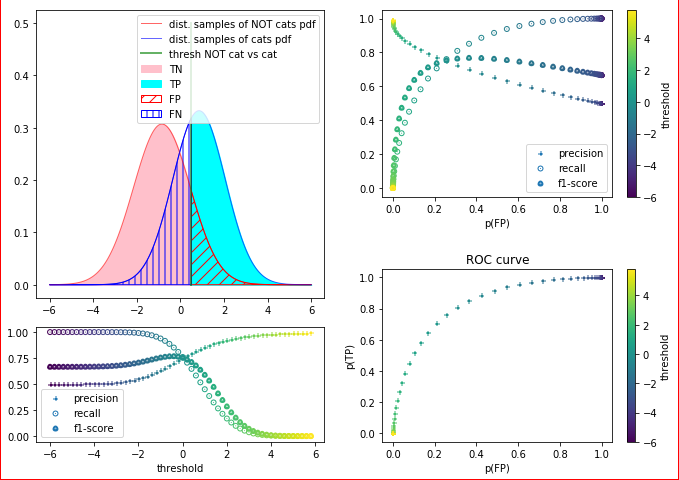

In [3]:
mu1, sigma1 = -0.85, 1.3
mu2, sigma2 =  0.85, 1.2
thresh = 0.5

def dist(x, a, b):
    return exp(-(x-a)*(x-a)/2/b/b)/sqrt(2*pi)/b   #norm.pdf(x,a,b)

A=6
x = np.linspace(-A,A, 100)
x_left = np.linspace(-A     ,thresh, 100)
x_right = np.linspace(thresh,A     , 100)
f1_left  = dist(x_left,mu1,sigma1)
f1_right = dist(x_right,mu1,sigma1)
f2_left  = dist(x_left,mu2,sigma2)
f2_right = dist(x_right,mu2,sigma2)

fp = []
tp = []
th = []
precis = []
recall = []
f1scor = []
for thresh in np.arange(-A,A,0.2):
    samples = 1
    #TN = samples*quad(dist, -np.inf, thresh, args=(mu1,sigma1))[0]
    TP = samples*quad(dist,  thresh, np.inf, args=(mu2,sigma2))[0]
    FP = samples*quad(dist,  thresh, np.inf, args=(mu1,sigma1))[0]
    FN = samples*quad(dist, -np.inf, thresh, args=(mu2,sigma2))[0]
    fp.append(FP)
    tp.append(TP)
    th.append(thresh)
    precis.append(TP/(TP+FP))
    recall.append(TP/(TP+FN))
    f1scor.append(2*TP/(2*TP+FN+FP))
    
thresh = 0.5
fig = plt.figure(figsize=(4,4),edgecolor = 'red',linewidth=2,frameon=True)
ax1 = fig.add_axes([0.0,0.5,1.0,1.0], projection=None, polar=False)

ax1.plot(x_left, f1_left,'r-', lw=1, alpha=0.6, label='dist. samples of NOT cats pdf')
ax1.fill_between(x_left, 0, f1_left,color='pink',label='TN')
ax1.plot(x_right, f1_right,'r-', lw=1, alpha=0.6)
ax1.plot(x_left, f2_left,'b-', lw=1, alpha=0.6, label='dist. samples of cats pdf')
ax1.plot(x_right, f2_right,'b-', lw=1, alpha=0.6)
ax1.fill_between(x_right, 0, f2_right,color='cyan',label='TP')
ax1.fill_between(x_right, 0, f1_right, hatch='//', edgecolor='red',facecolor='none',label='FP')
ax1.fill_between(x_left,  0, f2_left, hatch='||', edgecolor='blue',facecolor='none',label='FN')
ax1.plot([thresh,thresh], [0,0.5], 'g-', lw=2, alpha=0.6,label='thresh NOT cat vs cat')
ax1.legend()

ax2 = fig.add_axes([1.2,0.0,1.0,0.6], projection=None, polar=False)   
im = ax2.scatter(fp,tp,marker='+',lw=5, cmap = 'viridis', s = 1,c =th)
ax2.set_xlabel('p(FP)')
ax2.set_ylabel('p(TP)')
ax2.set_title('ROC curve')
cbar = fig.colorbar(im,orientation='vertical')
cbar.set_label('threshold')

ax3 = fig.add_axes([1.2,0.85,1.0,0.65], projection=None, polar=False)
ax3.scatter(fp,precis,marker='+',lw=5, cmap = 'viridis', s = 1,c =th,label = 'precision')
ax3.scatter(fp,recall,marker='o',lw=5, cmap = 'viridis', s = 1,c =th,label = 'recall')
ax3.scatter(fp,f1scor,marker='^',lw=5, cmap = 'viridis', s = 1,c =th,label = 'f1-score')
ax3.set_xlabel('p(FP)')
ax3.legend()
cbar = fig.colorbar(im,orientation='vertical')
cbar.set_label('threshold')

ax4 = fig.add_axes([0,0,1.0,0.40], projection=None, polar=False)
ax4.scatter(th,precis,marker='+',lw=5, cmap = 'viridis', s = 1,c =th,label = 'precision')
ax4.scatter(th,recall,marker='o',lw=5, cmap = 'viridis', s = 1,c =th,label = 'recall')
ax4.scatter(th,f1scor,marker='^',lw=5, cmap = 'viridis', s = 1,c =th,label = 'f1-score')
ax4.set_xlabel('threshold')
ax4.legend()

### Revealing example - infection test

- inhabitants ... N
- infectionRate ... r
- req. precision ... prec
- req. recall ... reca

therefore we have the equations
- N r =  FN+TP
- N (1-r) = TN+FP
- prec = TP/(TP+FP)
- reca = TP/(TP+FN)

Matrix

| TP | FP |
| --- | --- |
| FN | TN |

In [50]:
np.set_printoptions(suppress=True)
inhabitants = 82000000
infectioRate = 0.0008
reqPrecision = 0.999
reqRecall    = 0.99

TP_est = reqRecall*inhabitants*infectioRate
#FN_est = inhabitants*infectioRate - TP_est
FN_est = int(inhabitants*infectioRate * (1-reqRecall))
FP_est = TP_est/reqPrecision-TP_est
TN_est = inhabitants*(1-infectioRate)-FP_est



m = np.array([[TP_est,  FP_est],[FN_est,TN_est]])
m.astype(int)
#m = np.array([[66933,81933],[67,81851067]])
print('   [ TP | FP ]')
print('   [ FN | TN ]')
print()
print(m,'\n')
TP=m[0,0]
FP=m[0,1]
FN=m[1,0]
TN=m[1,1]
print('TP = ',TP)
print('FP = ',FP)
print('FN = ',FN)
print('TN = ',TN)
print()
print('precision = ',TP/(TP+FP))
print('recall    = ',TP/(TP+FN))
print('f1-score  = ',2*TP/(2*TP+FN+FP))

   [ TP | FP ]
   [ FN | TN ]

[[   64944.               65.00900901]
 [     656.         81934334.990991  ]] 

TP =  64944.0
FP =  65.00900900900888
FN =  656.0
TN =  81934334.990991

precision =  0.999
recall    =  0.99
f1-score  =  0.9944796380090498
